In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def read_xyz(file_dir):
    with open(file_dir) as f:
        lines = f.readlines()
    line1 = lines[0]
    mol_num = len([L for L in lines if L == line1])
    atom_lists, positions = [], []
    idx = 0
    for _ in range(mol_num):
        atom_n = int(lines[idx].split()[-1])
        idx += 2
        atoms, pos = [], []
        for i in range(atom_n):
            parts = lines[idx].split()
            atoms.append(parts[0])
            pos.append(list(map(float, parts[1:])))
            idx += 1
        atom_lists.append(atoms)
        positions.append(pos)
    return atom_lists, np.array(positions)

def get_torsion(A, B, C, D):
    ABxAC = np.cross(A - B, C - B)
    DBxDC = np.cross(B - C, D - C)
    cos0 = np.dot(ABxAC, DBxDC) / (np.linalg.norm(ABxAC) * np.linalg.norm(DBxDC))
    sign = np.dot(np.cross(ABxAC, DBxDC), C - B)
    angle = np.degrees(np.arccos(np.clip(cos0, -1, 1)))
    return angle if sign >= 0 else -angle

def get_torsions_from_file(fname, ia, ib, ic, id):
    _, pos = read_xyz(fname)
    tors = []
    for mol in pos:
        tors.append(get_torsion(
            mol[ia-1], mol[ib-1], mol[ic-1], mol[id-1]
        ))
    return np.array(tors)

def smooth_dist(y, eachsize=2.0, n_points=300):
    y = np.array(y)
    bins = np.arange(-180, 180 + eachsize, eachsize)
    counts, _ = np.histogram(y, bins=bins)
    pdf = counts / counts.sum()
    x_centers = (bins[:-1] + bins[1:]) / 2
    spline = make_interp_spline(x_centers, pdf)
    x_smooth = np.linspace(-180, 180, n_points)
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

def plot_iceberg(file1, file2, idxs1, idxs2, eachsize=0.5):
  
    tors1 = get_torsions_from_file(file1, *idxs1)
    tors2 = get_torsions_from_file(file2, *idxs2)

    x1, y1 = smooth_dist(tors1, eachsize=eachsize)
    x2, y2 = smooth_dist(tors2, eachsize=eachsize)

    y1 = np.clip(y1, 0, None)
    y2 = np.clip(y2, 0, None)

    plt.fill_between(x1, y1, 0, where=y1>0, color='C0', alpha=0.3)
    plt.plot(x1, y1, color='C0') 
    plt.fill_between(x2, -y2, 0, where=y2>0, color='C1', alpha=0.3)
    plt.plot(x2, -y2, color='C1')  

    plt.axhline(0, color='k', linewidth=1.3, zorder=5)

    plt.xlim(-180, 180)
    plt.xticks([-180, -90, 0, 90, 180],
               ["-180", "-90", "0", "90", "180"],
               fontsize=18)
    
    plt.ylim(0, 0.4)
    yticks = [-0.4, -0.2, 0, 0.2, 0.4]
    ylabels = ["0.4", "0.2", "0.0", "0.2", "0.4"]
    plt.yticks(yticks, ylabels, fontsize=18)

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']

    plt.tight_layout()
    plt.show()


In [6]:
# Catalyst-QD
#a: 19, 18, 4, 12
#b: 32, 19, 18, 75
#c: 70, 15, 14, 69
#d: 42, 2, 15, 70
#e: 34, 33, 15, 2
#f: 6, 42, 2, 15

# Catalyst-QD-Vinyl
#a: 35, 32, 4, 19
#b: 36, 35, 32, 34
#c: 8, 7, 9, 10
#d: 78, 2, 7, 8
#e: 59, 58, 7, 2
#f: 5, 78, 2, 7

f1 = "QD-merged.xyz"
f2 = "Q-merged.xyz"


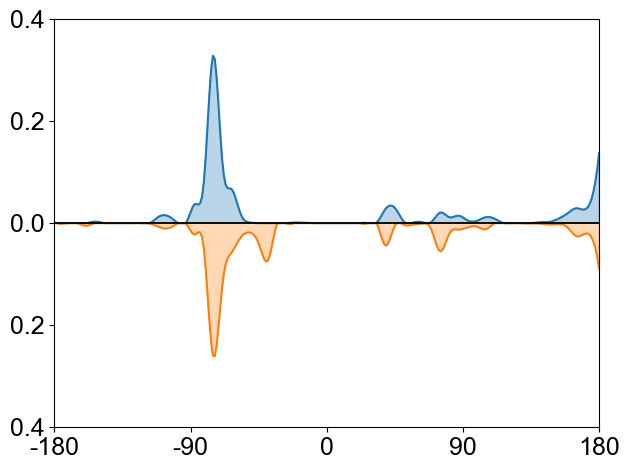

In [ ]:
#dihedral a

idxs1 = (19, 18, 4, 12)
idxs2 = (35, 32, 4, 19)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)

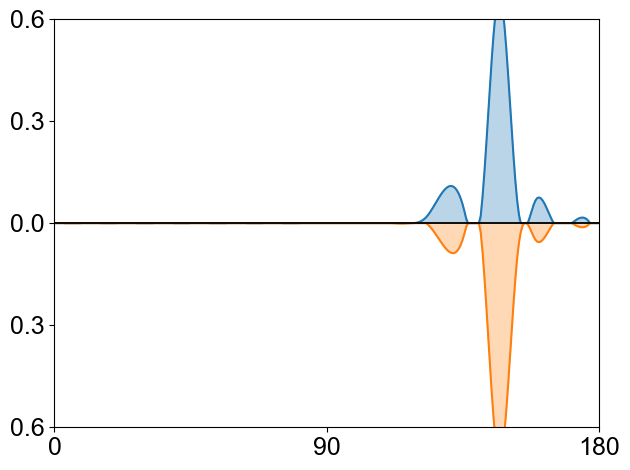

In [15]:
#dihedral b: for bond b, the distribution of dihedral angle is not (-180, 180), instead it is (0,180). In this regard, the code for drawing needs to be edited.

def smooth_dist(y, eachsize=2.0, n_points=300):
    y = np.array(y)
    bins = np.arange(0, 180 + eachsize, eachsize)
    counts, _ = np.histogram(y, bins=bins)
    pdf = counts / counts.sum()
    x_centers = (bins[:-1] + bins[1:]) / 2
    spline = make_interp_spline(x_centers, pdf)
    x_smooth = np.linspace(0, 180, n_points)
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

def plot_iceberg(file1, file2, idxs1, idxs2, eachsize=0.5):
  
    tors1 = get_torsions_from_file(file1, *idxs1)
    tors2 = get_torsions_from_file(file2, *idxs2)

    x1, y1 = smooth_dist(tors1, eachsize=eachsize)
    x2, y2 = smooth_dist(tors2, eachsize=eachsize)

    y1 = np.clip(y1, 0, None)
    y2 = np.clip(y2, 0, None)

    plt.fill_between(x1, y1, 0, where=y1>0, color='C0', alpha=0.3)
    plt.plot(x1, y1, color='C0') 
    plt.fill_between(x2, -y2, 0, where=y2>0, color='C1', alpha=0.3)
    plt.plot(x2, -y2, color='C1')  

    plt.axhline(0, color='k', linewidth=1.3, zorder=5)

    plt.xlim(0, 180)
    plt.xticks([0, 90, 180],
               ["0", "90", "180"],
               fontsize=18)
    
    plt.ylim(0, 0.6)
    yticks = [-0.6, -0.3, 0, 0.3, 0.6]
    ylabels = ["0.6", "0.3", "0.0", "0.3", "0.6"]
    plt.yticks(yticks, ylabels, fontsize=18)

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']

    plt.tight_layout()
    plt.show()


idxs1 = (32, 19, 18, 75)
idxs2 = (36, 35, 32, 34)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)

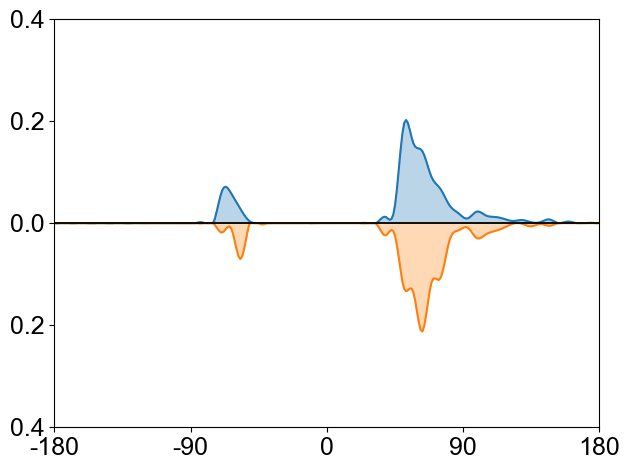

In [18]:
#dihedral c

idxs1 = (70, 15, 14, 69)
idxs2 = (8, 7, 9, 10)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)

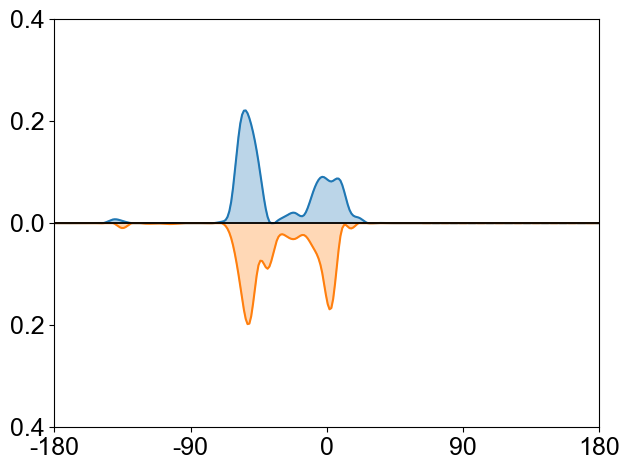

In [19]:
#dihedral d

idxs1 = (42, 2, 15, 70)
idxs2 = (78, 2, 7, 8)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)

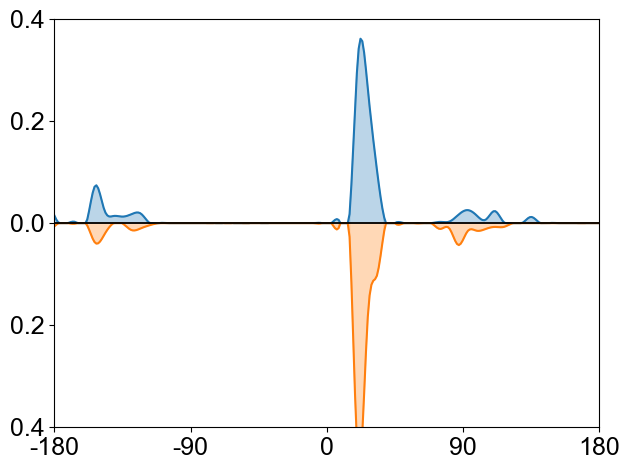

In [20]:
#dihedral e

idxs1 = (34, 33, 15, 2)
idxs2 = (59, 58, 7, 2)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)

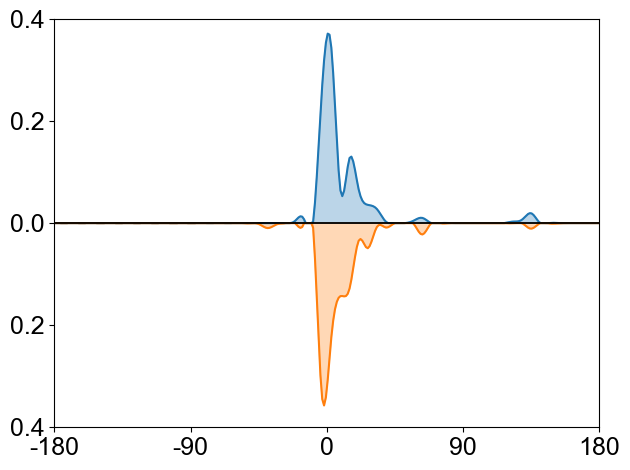

In [21]:
#dihedral f

idxs1 = (6, 42, 2, 15)
idxs2 = (5, 78, 2, 7)
plot_iceberg(f1, f2, idxs1, idxs2, eachsize=6)